# Activity 2.3 - CNN Network Architectures

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [115]:
# install opencv if you haven't
#pip install opencv-python
#pip install pillow

In [116]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
#from scipy.misc.pilutil import imread

import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [117]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [118]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10

        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [119]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

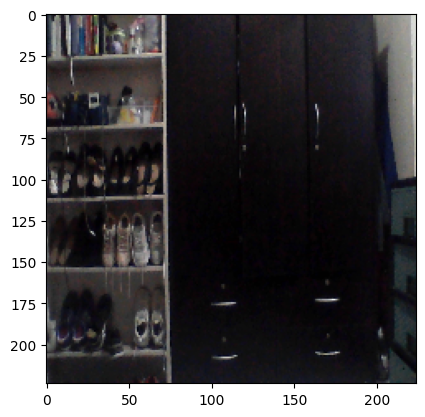

In [120]:
plt.imshow(plt.imread(img_path))

Use VGG-16 pre-trained model

In [121]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Create a function to load model, image, preprocess input and targets

In [122]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [123]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 3s 3s/step


,Predicted Class,Name,Probability
0,n04200800,shoe_shop,0.379339
1,n03742115,medicine_chest,0.111170
2,n04550184,wardrobe,0.077239
3,n02870880,bookcase,0.067054
4,n03018349,china_cabinet,0.066540
5,n04443257,tobacco_shop,0.034747
6,n04525305,vending_machine,0.029193
7,n04070727,refrigerator,0.028126
8,n04462240,toyshop,0.020289
9,n03916031,perfume,0.019142


Interpret the result of prediction using VGG16 model

Though most of the predictions made by the model, were severely inaacurate, this could be attested to the quality and lighting of the picture taken. Though needless to say there were some predictions that were close, that being the bookcase, but if we were to look at the probability of that specific prediction, we are able to see that it ranked severely low. 

Use Resnet50 pretrained model

In [124]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_22 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_22[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

Predict the result

In [125]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 [==============================] - 5s 5s/step


,Predicted Class,Name,Probability
0,n03742115,medicine_chest,0.836956
1,n02823428,beer_bottle,0.035269
2,n04070727,refrigerator,0.029716
3,n04591713,wine_bottle,0.016851
4,n03018349,china_cabinet,0.015977
5,n03916031,perfume,0.012791
6,n03983396,pop_bottle,0.010437
7,n04550184,wardrobe,0.007441
8,n04525305,vending_machine,0.007201
9,n03290653,entertainment_center,0.002873


Interpret the result using RESNET50 pretrained model

Similarly to VGG16, there were some predictions that were made that were off based, but the difference that was noticable in comparison to the last model was that it was able to predict one of the object correctly, that being the wardrobe, which in contrast to the last model was simply close to the guess but still wasnt able to get it correct, but once again if we were to see the probability of it, it ranked severely low.

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image.
* Compare their accuracy results.

In [126]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(299, 299)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [127]:
from keras.applications import xception


Xception_model = xception.Xception(weights='imagenet')
Xception_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_23 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_23[0][0]']            
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]

In [128]:
predict_image(Xception_model, img_path, xception.preprocess_input, xception.decode_predictions)

1/1 [==============================] - 3s 3s/step


,Predicted Class,Name,Probability
0,n02823428,beer_bottle,0.225180
1,n04591713,wine_bottle,0.082541
2,n03742115,medicine_chest,0.061077
3,n03018349,china_cabinet,0.040287
4,n04070727,refrigerator,0.038345
5,n04550184,wardrobe,0.022628
6,n03983396,pop_bottle,0.019229
7,n04200800,shoe_shop,0.016438
8,n04525305,vending_machine,0.012140
9,n04423845,thimble,0.011793


From the first run,the error that occured was a mismatch of shape that the model had expected vs what was already present. So a modification had to be made to the predict image function to allow the pre-trained model to function

In [129]:
from keras.applications import inception_v3


inception_v3 = inception_v3.InceptionV3(weights='imagenet')
inception_v3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_24 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_114 (Conv2D)         (None, 149, 149, 32)         864       ['input_24[0][0]']            
                                                                                                  
 batch_normalization_114 (B  (None, 149, 149, 32)         96        ['conv2d_114[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_94 (Activation)  (None, 149, 149, 32)         0         ['batch_normalizati

In [130]:
predict_image(Xception_model, img_path, xception.preprocess_input, xception.decode_predictions)

1/1 [==============================] - 1s 1s/step


,Predicted Class,Name,Probability
0,n02823428,beer_bottle,0.225180
1,n04591713,wine_bottle,0.082541
2,n03742115,medicine_chest,0.061077
3,n03018349,china_cabinet,0.040287
4,n04070727,refrigerator,0.038345
5,n04550184,wardrobe,0.022628
6,n03983396,pop_bottle,0.019229
7,n04200800,shoe_shop,0.016438
8,n04525305,vending_machine,0.012140
9,n04423845,thimble,0.011793


In [131]:
from keras.applications import vgg19


vgg19_model = vgg19.VGG19(weights='imagenet')
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [132]:
predict_image(Xception_model, img_path, xception.preprocess_input, xception.decode_predictions)

1/1 [==============================] - 4s 4s/step


,Predicted Class,Name,Probability
0,n02823428,beer_bottle,0.225180
1,n04591713,wine_bottle,0.082541
2,n03742115,medicine_chest,0.061077
3,n03018349,china_cabinet,0.040287
4,n04070727,refrigerator,0.038345
5,n04550184,wardrobe,0.022628
6,n03983396,pop_bottle,0.019229
7,n04200800,shoe_shop,0.016438
8,n04525305,vending_machine,0.012140
9,n04423845,thimble,0.011793


#### Conclusion

This activity, had made us used pre-trained models. With this I had noticed that the detection was not as accurate as expected. From the few models that were used to test identify objects in the image. Certain objects that were not in the frame was still detected, though the models were still able to detect some of the objects.